Proposed Method with Mode Imputation - PIMA Dataset

In [32]:
import pandas as p
data = p.read_csv('N:\STUDY\SEM_8\Capstone\Fusion-Based Ensemble Learning Framework for Enhanced Diabetes Classification\Codes\PIMA.csv')

In [33]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Missing values are marked as Zero's

In [35]:
(data == 0).sum() 

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [36]:
print(data['Outcome'].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


In [37]:
# Fill missing values (represented as 0) with the mode of each column
zero_as_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in zero_as_missing:
    mode_val = data[col].mode()[0]  # Get the most frequent value
    data[col] = data[col].replace(0, mode_val)


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

z_scores = np.abs((data - data.mean()) / data.std())

# Set threshold (commonly 3) to detect outliers
outlier_threshold = 3
outliers = (z_scores > outlier_threshold)

# Count the number of outliers in each column
outlier_counts = outliers.sum()
print("Outliers detected per column (Z-score method):")
print(outlier_counts)

Outliers detected per column (Z-score method):
Pregnancies                  4
Glucose                      0
BloodPressure                8
SkinThickness                1
Insulin                     18
BMI                          5
DiabetesPedigreeFunction    11
Age                          5
Outcome                      0
dtype: int64


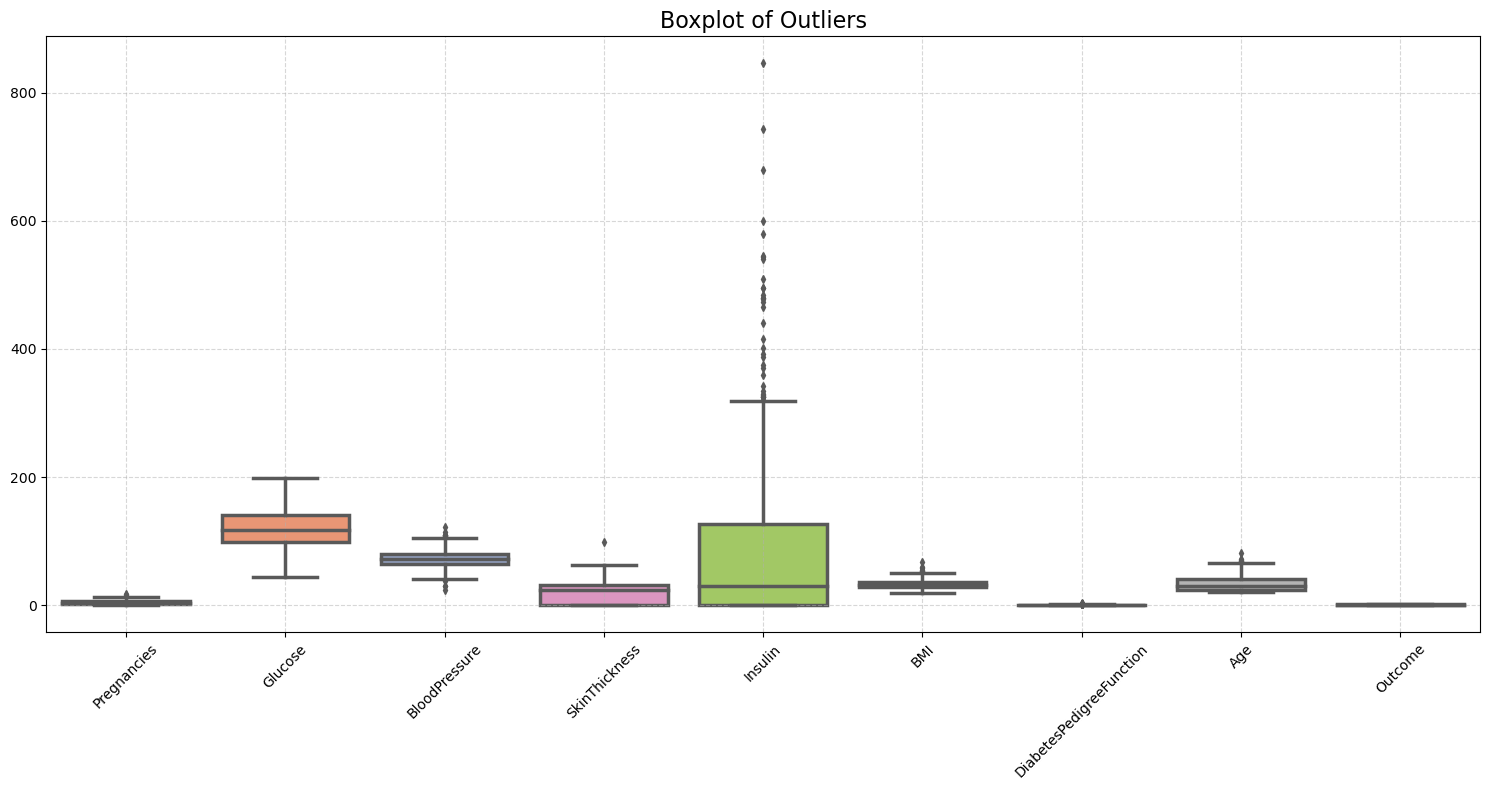

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.boxplot(data=data, palette="Set2", linewidth=2.5, fliersize=4)
plt.title('Boxplot of Outliers', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [40]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)  # First quartile (25th percentile)
    Q3 = data.quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

# Apply IQR method
outliers_iqr = data.apply(detect_outliers_iqr)

# Count outliers per column
print("Outliers detected per column (IQR method):")
print(outliers_iqr.sum())


Outliers detected per column (IQR method):
Pregnancies                  4
Glucose                      0
BloodPressure               14
SkinThickness                1
Insulin                     34
BMI                          8
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64


In [41]:
# Replace outliers with mode values
for col in data.columns:
    if data[col].dtype != 'object':  # Ensure the column is numeric
        mode_value = data[col].mode()[0]  # Select the first mode if multiple
        data[col] = np.where(outliers_iqr[col], mode_value, data[col])

print("Outliers replaced with mode values.")


Outliers replaced with mode values.


In [42]:
print(data['Outcome'].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


In [43]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
from sklearn.preprocessing import StandardScaler # type: ignore
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}


ML Model with Mode Imputation

In [47]:
from sklearn.metrics import accuracy_score
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"{name} Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.74
Decision Tree Accuracy: 0.65
Random Forest Accuracy: 0.74
SVM Accuracy: 0.71
K-Nearest Neighbors Accuracy: 0.68


Ml Model With Their Classification Report and Confusion matrix


 Logistic Regression Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.80      0.81      0.80       151
    Diabetes       0.63      0.61      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



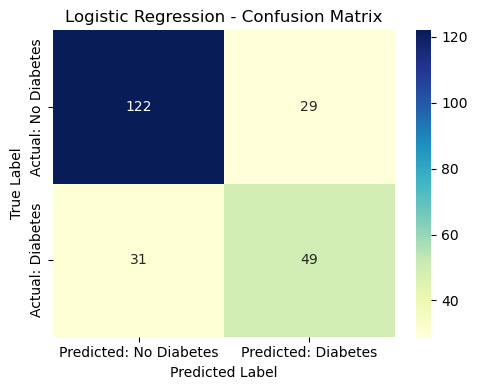


 SVM Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.76      0.81      0.78       151
    Diabetes       0.59      0.51      0.55        80

    accuracy                           0.71       231
   macro avg       0.67      0.66      0.66       231
weighted avg       0.70      0.71      0.70       231



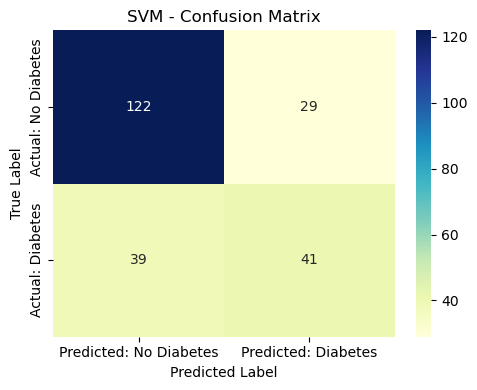


 Random Forest Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.79      0.80      0.79       151
    Diabetes       0.61      0.59      0.60        80

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.70       231
weighted avg       0.72      0.73      0.73       231



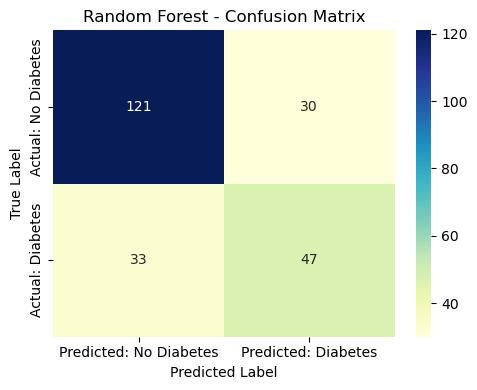

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


# Models dictionary
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='saga', random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
}

# 🔹 Evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Print classification report
    print(f"\n {name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["No Diabetes", "Diabetes"]))
    
    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
                xticklabels=["Predicted: No Diabetes", "Predicted: Diabetes"],
                yticklabels=["Actual: No Diabetes", "Actual: Diabetes"])
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()


Proposed Method with Mode Imputation

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(max_iter=500, solver='saga', random_state=42)
svm = SVC(probability=True, random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Train models
log_reg.fit(X_train, y_train)
svm.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Get probability scores for each class (shape: [num_samples, num_classes])
log_prob = log_reg.predict_proba(X_test)
svm_prob = svm.predict_proba(X_test)
rf_prob = rf_model.predict_proba(X_test)

#  Step 1: Multiply probabilities for each class across models
final_prob = log_prob * svm_prob * rf_prob  # Element-wise multiplication

#  Step 2: Select the class with the highest probability
final_prediction = np.argmax(final_prob, axis=1)  # Class with max probability

# Calculate accuracy
final_accuracy = accuracy_score(y_test, final_prediction)

# Print results
print(f"Final Model Accuracy: {final_accuracy:.4f}")


Final Model Accuracy: 0.7446


Confusion Matrix for Proposed method

Final Model Accuracy: 0.7446
Precision: 0.6400
Recall: 0.6000
F1 Score: 0.6194


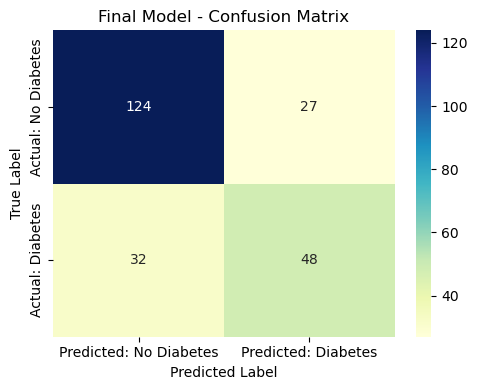

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
accuracy = accuracy_score(y_test, final_prediction)
precision = precision_score(y_test, final_prediction)
recall = recall_score(y_test, final_prediction)
f1 = f1_score(y_test, final_prediction)
cm = confusion_matrix(y_test, final_prediction)

# 🔹 Print metrics
print(f"Final Model Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# 🔹 Confusion Matrix Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=["Predicted: No Diabetes", "Predicted: Diabetes"],
            yticklabels=["Actual: No Diabetes", "Actual: Diabetes"])
plt.title("Final Model - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

5 Fold Cross Validation for Proposed method

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#  Initialize Stratified 5-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#  Initialize lists to store accuracy scores
accuracies = []

#  Iterate through each fold
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #  Apply Feature Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define models
    log_reg = LogisticRegression(max_iter=500, solver='saga', random_state=42)
    svm = SVC(probability=True, random_state=42)
    rf_model = RandomForestClassifier(random_state=42)

    # Train models
    log_reg.fit(X_train, y_train)
    svm.fit(X_train, y_train)
    rf_model.fit(X_train, y_train)

    # Get probability scores for each class (shape: [num_samples, num_classes])
    log_prob = log_reg.predict_proba(X_test)
    svm_prob = svm.predict_proba(X_test)
    rf_prob = rf_model.predict_proba(X_test)

    #  Multiply the probabilities for each class across models
    final_prob = log_prob * svm_prob * rf_prob  # Element-wise multiplication

    #  Select the class with the highest probability
    final_prediction = np.argmax(final_prob, axis=1)

    # Calculate accuracy for this fold
    fold_accuracy = accuracy_score(y_test, final_prediction)
    accuracies.append(fold_accuracy)

    print(f"Fold Accuracy: {fold_accuracy:.4f}")

#  Calculate & Print Average Accuracy
final_accuracy = np.mean(accuracies)
print(f"\nFinal 5-Fold Cross-Validation Accuracy: {final_accuracy:.4f}")


Fold Accuracy: 0.7532
Fold Accuracy: 0.7792
Fold Accuracy: 0.7662
Fold Accuracy: 0.7386
Fold Accuracy: 0.7059

Final 5-Fold Cross-Validation Accuracy: 0.7486


Confusion Matrix of 5 Fold CV Proposed method


Final 5-Fold Cross-Validation Average Accuracy: 0.7486
Final 5-Fold Cross-Validation Average Precision: 0.6839
Final 5-Fold Cross-Validation Average Recall: 0.5336
Final 5-Fold Cross-Validation Average F1-Score: 0.5979


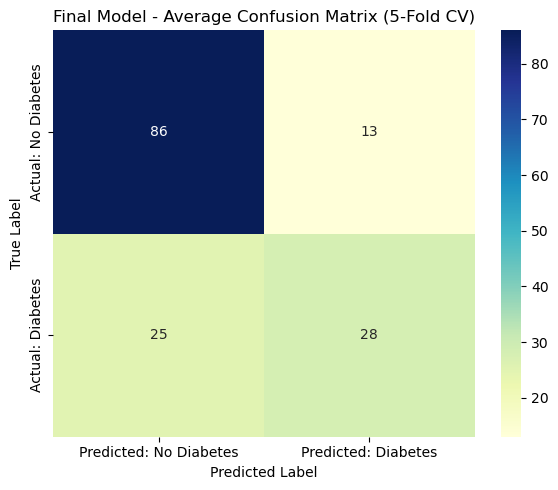

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Stratified 5-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []
confusion_matrices = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply Feature Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define models
    log_reg = LogisticRegression(max_iter=500, solver='saga', random_state=42)
    svm = SVC(probability=True, random_state=42)
    rf_model = RandomForestClassifier(random_state=42)

    # Train models
    log_reg.fit(X_train, y_train)
    svm.fit(X_train, y_train)
    rf_model.fit(X_train, y_train)

    # Get probability scores for each class (shape: [num_samples, num_classes])
    log_prob = log_reg.predict_proba(X_test)
    svm_prob = svm.predict_proba(X_test)
    rf_prob = rf_model.predict_proba(X_test)

    # Multiply the probabilities for each class across models
    final_prob = log_prob * svm_prob * rf_prob  # Element-wise multiplication

    # Select the class with the highest probability
    final_prediction = np.argmax(final_prob, axis=1)

    # Calculate metrics for this fold
    accuracy = accuracy_score(y_test, final_prediction)
    precision = precision_score(y_test, final_prediction)
    recall = recall_score(y_test, final_prediction)
    f1 = f1_score(y_test, final_prediction)
    cm = confusion_matrix(y_test, final_prediction)

    # Append metrics for this fold
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    confusion_matrices.append(cm)

   

# Calculate and print average metrics
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1_score = np.mean(f1_scores)

print(f"\nFinal 5-Fold Cross-Validation Average Accuracy: {avg_accuracy:.4f}")
print(f"Final 5-Fold Cross-Validation Average Precision: {avg_precision:.4f}")
print(f"Final 5-Fold Cross-Validation Average Recall: {avg_recall:.4f}")
print(f"Final 5-Fold Cross-Validation Average F1-Score: {avg_f1_score:.4f}")

# Get the final confusion matrix (average across all folds)
final_cm = np.mean(confusion_matrices, axis=0).astype(int)

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(final_cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=["Predicted: No Diabetes", "Predicted: Diabetes"],
            yticklabels=["Actual: No Diabetes", "Actual: Diabetes"])
plt.title("Final Model - Average Confusion Matrix (5-Fold CV)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


Using SMOTE()

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# 🔹 Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# 🔹 Apply SMOTE to the training set only
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 🔹 Apply Feature Scaling (StandardScaler)
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# 🔹 Print Class Distribution Before and After SMOTE
print("Class Distribution Before SMOTE:\n", y_train.value_counts())
print("\nClass Distribution After SMOTE:\n", pd.Series(y_train_resampled).value_counts())



Class Distribution Before SMOTE:
 Outcome
0    350
1    187
Name: count, dtype: int64

Class Distribution After SMOTE:
 Outcome
1    350
0    350
Name: count, dtype: int64


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}


ML Model After SMOTE() Applied

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


#  Train models and evaluate accuracy
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test set
    accuracy = accuracy_score(y_test, y_pred)  # Compute accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")  # Print accuracy


Logistic Regression Accuracy: 0.7489
Decision Tree Accuracy: 0.7100
Random Forest Accuracy: 0.7619
SVM Accuracy: 0.7835
K-Nearest Neighbors Accuracy: 0.6840


Confusion Matrix for ML Model After SMOTE() Applied


 Logistic Regression Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.82      0.79      0.80       150
    Diabetes       0.63      0.68      0.65        81

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231



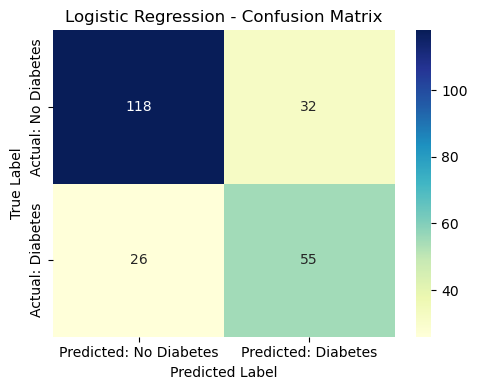


 SVM Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.84      0.83      0.83       150
    Diabetes       0.69      0.70      0.70        81

    accuracy                           0.78       231
   macro avg       0.76      0.77      0.76       231
weighted avg       0.78      0.78      0.78       231



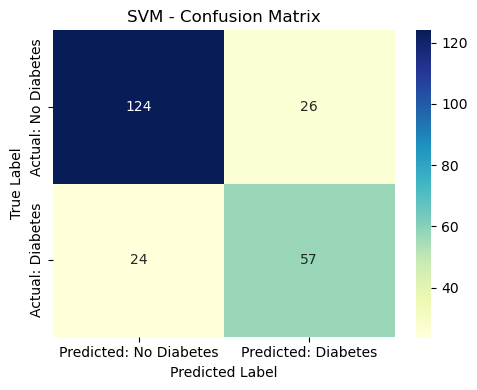


 Random Forest Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.80      0.81      0.81       150
    Diabetes       0.64      0.62      0.63        81

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



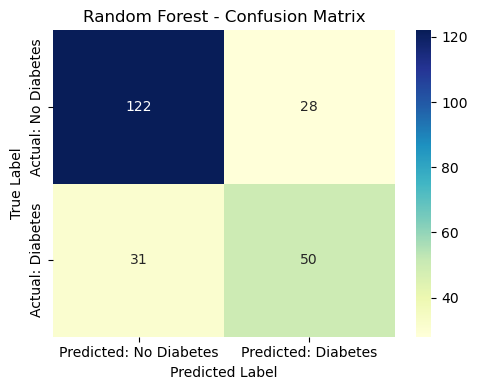

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier



# Models dictionary
models = {
    'Logistic Regression': LogisticRegression(max_iter=500, solver='saga', random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
}

#  Evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train_resampled, y_train_resampled)  # Train the model
    y_pred = model.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Print classification report
    print(f"\n {name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["No Diabetes", "Diabetes"]))
    
    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
                xticklabels=["Predicted: No Diabetes", "Predicted: Diabetes"],
                yticklabels=["Actual: No Diabetes", "Actual: Diabetes"])
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()


ML Model's classification Report After SMOTE() Applied


 Logistic Regression Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.82      0.79      0.80       150
    Diabetes       0.63      0.68      0.65        81

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231



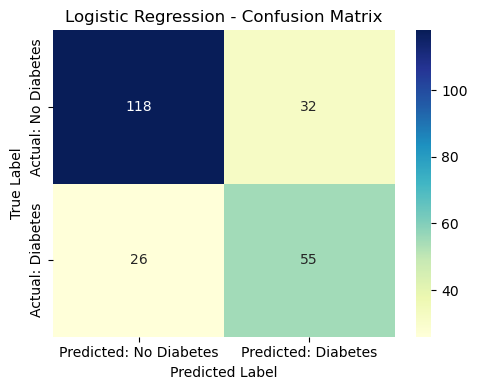


 SVM Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.84      0.83      0.83       150
    Diabetes       0.69      0.70      0.70        81

    accuracy                           0.78       231
   macro avg       0.76      0.77      0.76       231
weighted avg       0.78      0.78      0.78       231



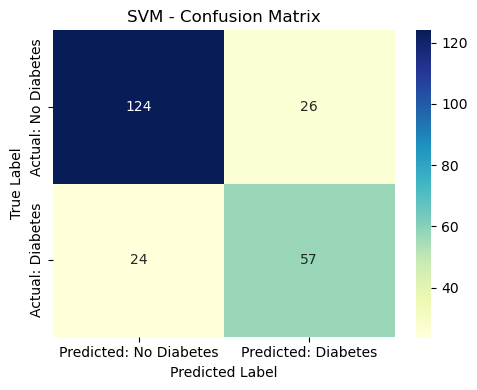


 Random Forest Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.80      0.81      0.81       150
    Diabetes       0.64      0.62      0.63        81

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



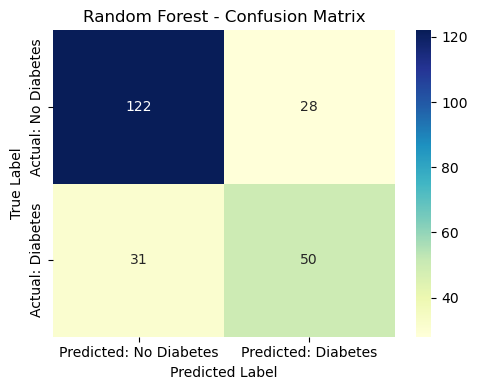


 Decision Tree Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.73      0.78      0.75       150
    Diabetes       0.54      0.47      0.50        81

    accuracy                           0.67       231
   macro avg       0.63      0.62      0.63       231
weighted avg       0.66      0.67      0.67       231



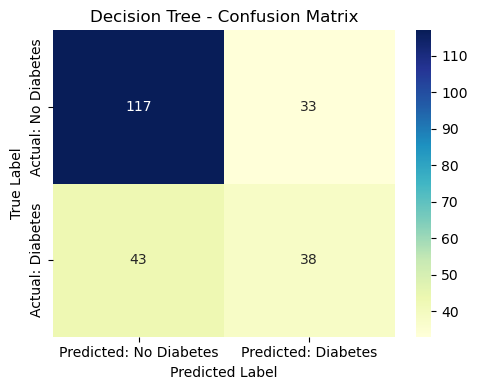


 KNN Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.78      0.71      0.75       150
    Diabetes       0.54      0.63      0.58        81

    accuracy                           0.68       231
   macro avg       0.66      0.67      0.66       231
weighted avg       0.70      0.68      0.69       231



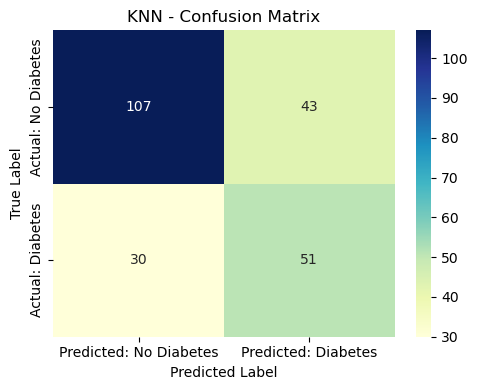

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Models dictionary
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='saga', random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

#  Evaluate each model
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Print classification report
    print(f"\n {name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["No Diabetes", "Diabetes"]))
    
    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
                xticklabels=["Predicted: No Diabetes", "Predicted: Diabetes"],
                yticklabels=["Actual: No Diabetes", "Actual: Diabetes"])
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()


Proposed Method with Mode Imputation After SMOTE() Applied

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


#   Train three ML models
log_reg = LogisticRegression(max_iter=1000, solver='saga', random_state=42)
svm = SVC(probability=True, random_state=42)
rf_model = RandomForestClassifier(random_state=42)

log_reg.fit(X_train_resampled, y_train_resampled)
svm.fit(X_train_resampled, y_train_resampled)
rf_model.fit(X_train_resampled, y_train_resampled)

#   Get probability scores for each class
log_prob = log_reg.predict_proba(X_test)
svm_prob = svm.predict_proba(X_test)
rf_prob = rf_model.predict_proba(X_test)

# Multiply probabilities for each class (element-wise)
final_prob = log_prob * svm_prob * rf_prob

#  Select the class with the highest probability
final_prediction = np.argmax(final_prob, axis=1)

# Calculate accuracy
final_accuracy = accuracy_score(y_test, final_prediction)

# Print results
print(f"Final Model Accuracy (SMOTE Applied): {final_accuracy:.4f}")


Final Model Accuracy (SMOTE Applied): 0.7879


In [59]:
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, final_prediction, target_names=["No Diabetes", "Diabetes"]))


Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.84      0.83      0.84       150
    Diabetes       0.69      0.72      0.70        81

    accuracy                           0.79       231
   macro avg       0.77      0.77      0.77       231
weighted avg       0.79      0.79      0.79       231



Confusion Matrix of Proposed Method with Mode Imputation After SMOTE() Applied

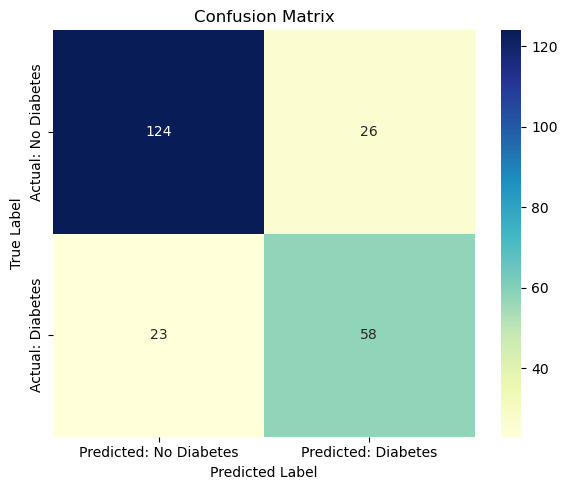

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm_final = confusion_matrix(y_test, final_prediction)

# Plot and save confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Predicted: No Diabetes', 'Predicted: Diabetes'],
            yticklabels=['Actual: No Diabetes', 'Actual: Diabetes'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()

# Save the image
plt.savefig("confusion_matrix.png", dpi=300)  # Saves in current working directory
plt.show()


5 Fold Cross Validation of Proposed Method with Mode Imputation After SMOTE() Applied

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#  Initialize Stratified 5-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#  Initialize lists to store accuracy scores
accuracies = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #  Apply Feature Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define models
    log_reg = LogisticRegression(max_iter=500, solver='saga', random_state=42)
    svm = SVC(probability=True, random_state=42)
    rf_model = RandomForestClassifier(random_state=42)

    # Train models
    log_reg.fit(X_train, y_train)
    svm.fit(X_train, y_train)
    rf_model.fit(X_train, y_train)

    # Get probability scores for each class (shape: [num_samples, num_classes])
    log_prob = log_reg.predict_proba(X_test)
    svm_prob = svm.predict_proba(X_test)
    rf_prob = rf_model.predict_proba(X_test)

    #  Multiply the probabilities for each class across models
    final_prob = log_prob * svm_prob * rf_prob  # Element-wise multiplication

    #  Select the class with the highest probability
    final_prediction = np.argmax(final_prob, axis=1)

    # Calculate accuracy for this fold
    fold_accuracy = accuracy_score(y_test, final_prediction)
    accuracies.append(fold_accuracy)

    print(f"Fold Accuracy: {fold_accuracy:.4f}")

#  Calculate & Print Average Accuracy
final_accuracy = np.mean(accuracies)
print(f"\nFinal 5-Fold Cross-Validation Accuracy: {final_accuracy:.4f}")


Fold Accuracy: 0.7532
Fold Accuracy: 0.7792
Fold Accuracy: 0.7662
Fold Accuracy: 0.7386
Fold Accuracy: 0.7059

Final 5-Fold Cross-Validation Accuracy: 0.7486


Confusion Matrix for Proposed Method with Mode Imputation After SMOTE() Applied


Final 5-Fold Cross-Validation Average Accuracy: 0.7486
Final 5-Fold Cross-Validation Average Precision: 0.6839
Final 5-Fold Cross-Validation Average Recall: 0.5336
Final 5-Fold Cross-Validation Average F1-Score: 0.5979


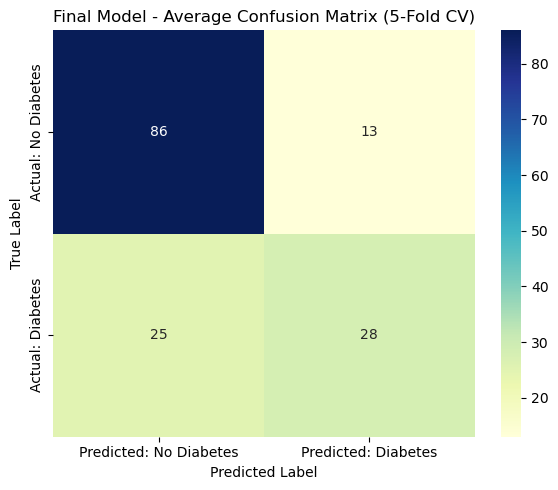

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Initialize Stratified 5-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []
confusion_matrices = []

# Iterate through each fold
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply Feature Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define models
    log_reg = LogisticRegression(max_iter=500, solver='saga', random_state=42)
    svm = SVC(probability=True, random_state=42)
    rf_model = RandomForestClassifier(random_state=42)

    # Train models
    log_reg.fit(X_train, y_train)
    svm.fit(X_train, y_train)
    rf_model.fit(X_train, y_train)

    # Get probability scores for each class (shape: [num_samples, num_classes])
    log_prob = log_reg.predict_proba(X_test)
    svm_prob = svm.predict_proba(X_test)
    rf_prob = rf_model.predict_proba(X_test)

    # Multiply the probabilities for each class across models
    final_prob = log_prob * svm_prob * rf_prob  # Element-wise multiplication

    # Select the class with the highest probability
    final_prediction = np.argmax(final_prob, axis=1)

    # Calculate metrics for this fold
    accuracy = accuracy_score(y_test, final_prediction)
    precision = precision_score(y_test, final_prediction)
    recall = recall_score(y_test, final_prediction)
    f1 = f1_score(y_test, final_prediction)
    cm = confusion_matrix(y_test, final_prediction)

    # Append metrics for this fold
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    confusion_matrices.append(cm)

# Calculate and print average metrics
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1_score = np.mean(f1_scores)

print(f"\nFinal 5-Fold Cross-Validation Average Accuracy: {avg_accuracy:.4f}")
print(f"Final 5-Fold Cross-Validation Average Precision: {avg_precision:.4f}")
print(f"Final 5-Fold Cross-Validation Average Recall: {avg_recall:.4f}")
print(f"Final 5-Fold Cross-Validation Average F1-Score: {avg_f1_score:.4f}")

# Get the final confusion matrix (average across all folds)
final_cm = np.mean(confusion_matrices, axis=0).astype(int)

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(final_cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=["Predicted: No Diabetes", "Predicted: Diabetes"],
            yticklabels=["Actual: No Diabetes", "Actual: Diabetes"])
plt.title("Final Model - Average Confusion Matrix (5-Fold CV)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()
